## Pytorch tutorial

In [3]:
import torch 
print(torch.__version__)

1.10.2+cu102


## Linear model

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X=[1.0,2.0,3.0]
y=[2.0,4.0,6.0]

In [6]:
def forward(X,w):
    return w*X

In [7]:
weights_array=[]
loss_array=[]
mse_array=[]

for weight in np.arange(0.0, 10.0, 0.1):
    for x,label in zip(X,y):
        prediction= forward(x,weight)
        loss= (prediction-label)*(prediction-label)
        loss_array.append(loss)
    mse=sum(loss_array)/len(loss_array)
    loss_array=[]
    print(f'for weight: {weight} loss: {mse}')
    weights_array.append(weight)
    mse_array.append(mse)    

for weight: 0.0 loss: 18.666666666666668
for weight: 0.1 loss: 16.846666666666668
for weight: 0.2 loss: 15.120000000000003
for weight: 0.30000000000000004 loss: 13.486666666666665
for weight: 0.4 loss: 11.946666666666667
for weight: 0.5 loss: 10.5
for weight: 0.6000000000000001 loss: 9.146666666666663
for weight: 0.7000000000000001 loss: 7.886666666666666
for weight: 0.8 loss: 6.719999999999999
for weight: 0.9 loss: 5.646666666666666
for weight: 1.0 loss: 4.666666666666667
for weight: 1.1 loss: 3.779999999999999
for weight: 1.2000000000000002 loss: 2.986666666666665
for weight: 1.3 loss: 2.2866666666666657
for weight: 1.4000000000000001 loss: 1.6799999999999995
for weight: 1.5 loss: 1.1666666666666667
for weight: 1.6 loss: 0.746666666666666
for weight: 1.7000000000000002 loss: 0.4199999999999995
for weight: 1.8 loss: 0.1866666666666665
for weight: 1.9000000000000001 loss: 0.046666666666666586
for weight: 2.0 loss: 0.0
for weight: 2.1 loss: 0.046666666666666835
for weight: 2.2 loss: 0.1

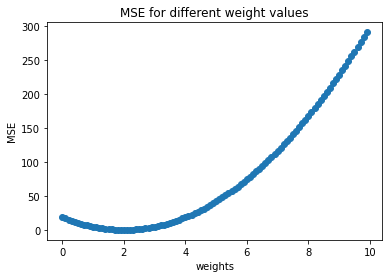

In [8]:
plt.scatter(weights_array,mse_array)
plt.title('MSE for different weight values')
plt.xlabel('weights')
plt.ylabel('MSE')
plt.show()

## Gradient Descent

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
X=[1.0,2.0,3.0]
y=[2.0,4.0,6.0]

In [11]:
weight=0.1

In [12]:
def forward(x):
    return x*weight

### Gradient calculation for updating weights:

Now weights are updated by gardient calculation: 
w = w_prev-α*(∂loss/∂w),
where ∂loss/∂w = ∂(w*x-y)^2/∂w= 2*(w*x-y)*(x),
so w=w_prev-α*(2*(w*x-y)*(x)),
where α is the learning rate and is usually defined as 0.01.

In [13]:
def gradient(x,y):
    return 2*(weight*x-y)*x

In [14]:
def loss(x,y):
    pred=forward(x)
    return (pred-y) * (pred-y)

In [15]:
weight=0.1
weights_array=[]
loss_array=[]
mse_array=[]

for epoch in range(500):
    for x,label in zip(X,y):
        prediction= forward(x)
        l= loss(x,label)
        loss_array.append(l)
        weight=weight-0.01*gradient(x,label)
    mse=sum(loss_array)/len(loss_array)
    loss_array=[]
    if epoch%10==0:
        print(f'epoch: {epoch} loss: {mse}')
    weights_array.append(weight)
    mse_array.append(mse)    

epoch: 0 loss: 14.629576791466667
epoch: 10 loss: 0.03481664115327463
epoch: 20 loss: 8.28594373217285e-05
epoch: 30 loss: 1.9719554000180814e-07
epoch: 40 loss: 4.693017748187503e-10
epoch: 50 loss: 1.1168820340162323e-12
epoch: 60 loss: 2.6580455142045492e-15
epoch: 70 loss: 6.3258296513030595e-18
epoch: 80 loss: 1.5054521194958308e-20
epoch: 90 loss: 3.58284155186949e-23
epoch: 100 loss: 8.53059884802095e-26
epoch: 110 loss: 2.0727320284682085e-28
epoch: 120 loss: 1.791371638939381e-30
epoch: 130 loss: 1.791371638939381e-30
epoch: 140 loss: 1.791371638939381e-30
epoch: 150 loss: 1.791371638939381e-30
epoch: 160 loss: 1.791371638939381e-30
epoch: 170 loss: 1.791371638939381e-30
epoch: 180 loss: 1.791371638939381e-30
epoch: 190 loss: 1.791371638939381e-30
epoch: 200 loss: 1.791371638939381e-30
epoch: 210 loss: 1.791371638939381e-30
epoch: 220 loss: 1.791371638939381e-30
epoch: 230 loss: 1.791371638939381e-30
epoch: 240 loss: 1.791371638939381e-30
epoch: 250 loss: 1.791371638939381e-30

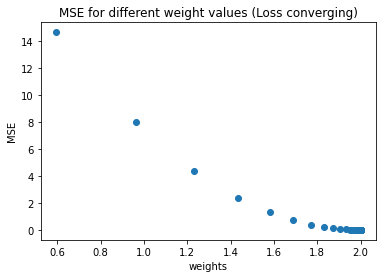

In [16]:
plt.scatter(weights_array,mse_array)
plt.title('MSE for different weight values (Loss converging)')
plt.xlabel('weights')
plt.ylabel('MSE')
plt.show()

In [17]:
#testing
x_test=4.0
print(f'for x:{x_test} predicted value is: {x_test*weight} ')
print(f'value is pretty accurate!')

for x:4.0 predicted value is: 7.999999999999997 
value is pretty accurate!


### Backpropagation and Gradient Descent (Autograd):

We calculated gradient manually in the previous case as the case simple but sometime gradients and very diffuicult or almost impossible to calculate.
we can easily calculate gradient of loss wrt weights using backpropagation.

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable    #for backpropagation to calculate gradient of loss wrt to weights 

In [19]:
X=[1.0,2.0,3.0]
y=[2.0,4.0,6.0]

In [20]:
weight= torch.tensor([1.0],requires_grad=True)   #for gradient calculation and backprop. till this point

In [21]:
def forward(x):
    return x * weight

In [22]:
def loss(x,y):
    return (prediction-y)**2

In [23]:
weights_array=[]
loss_array=[]
mse_array=[]

for epoch in range(500):
    for x,label in zip(X,y):
        prediction= forward(x)
        l= loss(x,label)
        l.backward()  #to calculate gradient using bp
        weight.data = weight.data - 0.01 * weight.grad.item()
        weight.grad.data.zero_()
    
    print(f"Epoch: {epoch} | Loss: {l.item()}")

Epoch: 0 | Loss: 7.315943717956543
Epoch: 1 | Loss: 3.9987640380859375
Epoch: 2 | Loss: 2.1856532096862793
Epoch: 3 | Loss: 1.1946394443511963
Epoch: 4 | Loss: 0.6529689431190491
Epoch: 5 | Loss: 0.35690122842788696
Epoch: 6 | Loss: 0.195076122879982
Epoch: 7 | Loss: 0.10662525147199631
Epoch: 8 | Loss: 0.0582793727517128
Epoch: 9 | Loss: 0.03185431286692619
Epoch: 10 | Loss: 0.017410902306437492
Epoch: 11 | Loss: 0.009516451507806778
Epoch: 12 | Loss: 0.005201528314501047
Epoch: 13 | Loss: 0.0028430151287466288
Epoch: 14 | Loss: 0.0015539465239271522
Epoch: 15 | Loss: 0.0008493617060594261
Epoch: 16 | Loss: 0.00046424579340964556
Epoch: 17 | Loss: 0.0002537401160225272
Epoch: 18 | Loss: 0.00013869594840798527
Epoch: 19 | Loss: 7.580435340059921e-05
Epoch: 20 | Loss: 4.143271507928148e-05
Epoch: 21 | Loss: 2.264650902361609e-05
Epoch: 22 | Loss: 1.2377059647405986e-05
Epoch: 23 | Loss: 6.768445018678904e-06
Epoch: 24 | Loss: 3.7000872907810844e-06
Epoch: 25 | Loss: 2.021880391112063e-0

Epoch: 265 | Loss: 9.094947017729282e-13
Epoch: 266 | Loss: 9.094947017729282e-13
Epoch: 267 | Loss: 9.094947017729282e-13
Epoch: 268 | Loss: 9.094947017729282e-13
Epoch: 269 | Loss: 9.094947017729282e-13
Epoch: 270 | Loss: 9.094947017729282e-13
Epoch: 271 | Loss: 9.094947017729282e-13
Epoch: 272 | Loss: 9.094947017729282e-13
Epoch: 273 | Loss: 9.094947017729282e-13
Epoch: 274 | Loss: 9.094947017729282e-13
Epoch: 275 | Loss: 9.094947017729282e-13
Epoch: 276 | Loss: 9.094947017729282e-13
Epoch: 277 | Loss: 9.094947017729282e-13
Epoch: 278 | Loss: 9.094947017729282e-13
Epoch: 279 | Loss: 9.094947017729282e-13
Epoch: 280 | Loss: 9.094947017729282e-13
Epoch: 281 | Loss: 9.094947017729282e-13
Epoch: 282 | Loss: 9.094947017729282e-13
Epoch: 283 | Loss: 9.094947017729282e-13
Epoch: 284 | Loss: 9.094947017729282e-13
Epoch: 285 | Loss: 9.094947017729282e-13
Epoch: 286 | Loss: 9.094947017729282e-13
Epoch: 287 | Loss: 9.094947017729282e-13
Epoch: 288 | Loss: 9.094947017729282e-13
Epoch: 289 | Los

Epoch: 488 | Loss: 9.094947017729282e-13
Epoch: 489 | Loss: 9.094947017729282e-13
Epoch: 490 | Loss: 9.094947017729282e-13
Epoch: 491 | Loss: 9.094947017729282e-13
Epoch: 492 | Loss: 9.094947017729282e-13
Epoch: 493 | Loss: 9.094947017729282e-13
Epoch: 494 | Loss: 9.094947017729282e-13
Epoch: 495 | Loss: 9.094947017729282e-13
Epoch: 496 | Loss: 9.094947017729282e-13
Epoch: 497 | Loss: 9.094947017729282e-13
Epoch: 498 | Loss: 9.094947017729282e-13
Epoch: 499 | Loss: 9.094947017729282e-13


In [24]:
x_test=4.0
print(f'for x:{x_test} predicted value is: {x_test*weight} ')
print(f'value is pretty accurate!')

for x:4.0 predicted value is: tensor([8.0000], grad_fn=<MulBackward0>) 
value is pretty accurate!


# Linear regression 

### Pytorch manner of building models:


1. Define the dataset.
2. Build the model as a class using nn.model.
3. Define loss function and optimizer.
4. Forward and backward propagation.

In [42]:
from torch import nn
import torch
from torch import tensor

x_data = tensor([[1.0], [2.0], [3.0]])
y_data = tensor([[2.0], [4.0], [6.0]])

In [43]:
class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        return y_pred

In [44]:
# our model
model = Model()

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
    
    y_pred = model(x_data)

    loss = criterion(y_pred, y_data)
    print(f'Epoch: {epoch} | Loss: {loss.item()} ')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# After training
hour_var = tensor([[4.0]])
y_pred = model(hour_var)
print("Prediction (after training)",  4 , model(hour_var).data[0][0].item())

Epoch: 0 | Loss: 7.126983165740967 
Epoch: 1 | Loss: 3.3930208683013916 
Epoch: 2 | Loss: 1.7276004552841187 
Epoch: 3 | Loss: 0.9830819964408875 
Epoch: 4 | Loss: 0.6485680341720581 
Epoch: 5 | Loss: 0.4966205358505249 
Epoch: 6 | Loss: 0.42599087953567505 
Epoch: 7 | Loss: 0.3916027843952179 
Epoch: 8 | Loss: 0.37339165806770325 
Epoch: 9 | Loss: 0.36242392659187317 
Epoch: 10 | Loss: 0.3547218441963196 
Epoch: 11 | Loss: 0.34851381182670593 
Epoch: 12 | Loss: 0.34301093220710754 
Epoch: 13 | Loss: 0.33786141872406006 
Epoch: 14 | Loss: 0.3329075276851654 
Epoch: 15 | Loss: 0.32807987928390503 
Epoch: 16 | Loss: 0.3233453333377838 
Epoch: 17 | Loss: 0.31868988275527954 
Epoch: 18 | Loss: 0.31410592794418335 
Epoch: 19 | Loss: 0.3095899224281311 
Epoch: 20 | Loss: 0.30513995885849 
Epoch: 21 | Loss: 0.30075398087501526 
Epoch: 22 | Loss: 0.29643192887306213 
Epoch: 23 | Loss: 0.29217156767845154 
Epoch: 24 | Loss: 0.2879723310470581 
Epoch: 25 | Loss: 0.2838340997695923 
Epoch: 26 | L

Epoch: 254 | Loss: 0.010313140228390694 
Epoch: 255 | Loss: 0.010164971463382244 
Epoch: 256 | Loss: 0.010018886998295784 
Epoch: 257 | Loss: 0.009874893352389336 
Epoch: 258 | Loss: 0.00973295234143734 
Epoch: 259 | Loss: 0.00959308072924614 
Epoch: 260 | Loss: 0.009455177001655102 
Epoch: 261 | Loss: 0.009319332428276539 
Epoch: 262 | Loss: 0.009185396134853363 
Epoch: 263 | Loss: 0.009053402580320835 
Epoch: 264 | Loss: 0.008923238143324852 
Epoch: 265 | Loss: 0.008794986642897129 
Epoch: 266 | Loss: 0.008668637834489346 
Epoch: 267 | Loss: 0.00854408461600542 
Epoch: 268 | Loss: 0.008421270176768303 
Epoch: 269 | Loss: 0.008300245739519596 
Epoch: 270 | Loss: 0.00818093866109848 
Epoch: 271 | Loss: 0.008063341490924358 
Epoch: 272 | Loss: 0.007947465404868126 
Epoch: 273 | Loss: 0.007833288051187992 
Epoch: 274 | Loss: 0.007720677647739649 
Epoch: 275 | Loss: 0.007609759457409382 
Epoch: 276 | Loss: 0.00750038493424654 
Epoch: 277 | Loss: 0.007392591796815395 
Epoch: 278 | Loss: 0.

# Logistic Regression

### Softmax Activation:
The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. That is, softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.

In [124]:
from torch import tensor
from torch import nn
from torch import sigmoid
import torch.nn.functional as F
import torch.optim as optim

# Training data and ground truth
x_data = tensor([[2.1,0.1], [4.2,0.8], [3.1,0.9], [3.3,0.2]])   #hours
y_data = tensor([[0.], [1.], [0.], [1.]])    #pass or not

In [125]:
print(x_data, y_data)

tensor([[2.1000, 0.1000],
        [4.2000, 0.8000],
        [3.1000, 0.9000],
        [3.3000, 0.2000]]) tensor([[0.],
        [1.],
        [0.],
        [1.]])


In [126]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = nn.Linear(2, 1)
        self.sigmoid= sigmoid

    def forward(self, x):
        out1 = self.l1(x)
        y_pred = self.sigmoid(out1)   #applying softmax activation to our prediction
        return y_pred

In [131]:
# our model
model = Model()
criterion = nn.BCELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=0.3)

In [132]:
# Training loop
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(f'Epoch {epoch + 1}/1000 | Loss: {loss.item():.4f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 1/1000 | Loss: 0.7348
Epoch 2/1000 | Loss: 0.6607
Epoch 3/1000 | Loss: 0.6537
Epoch 4/1000 | Loss: 0.6511
Epoch 5/1000 | Loss: 0.6487
Epoch 6/1000 | Loss: 0.6462
Epoch 7/1000 | Loss: 0.6438
Epoch 8/1000 | Loss: 0.6414
Epoch 9/1000 | Loss: 0.6390
Epoch 10/1000 | Loss: 0.6366
Epoch 11/1000 | Loss: 0.6342
Epoch 12/1000 | Loss: 0.6319
Epoch 13/1000 | Loss: 0.6295
Epoch 14/1000 | Loss: 0.6272
Epoch 15/1000 | Loss: 0.6248
Epoch 16/1000 | Loss: 0.6225
Epoch 17/1000 | Loss: 0.6202
Epoch 18/1000 | Loss: 0.6179
Epoch 19/1000 | Loss: 0.6156
Epoch 20/1000 | Loss: 0.6134
Epoch 21/1000 | Loss: 0.6111
Epoch 22/1000 | Loss: 0.6089
Epoch 23/1000 | Loss: 0.6067
Epoch 24/1000 | Loss: 0.6044
Epoch 25/1000 | Loss: 0.6022
Epoch 26/1000 | Loss: 0.6000
Epoch 27/1000 | Loss: 0.5979
Epoch 28/1000 | Loss: 0.5957
Epoch 29/1000 | Loss: 0.5935
Epoch 30/1000 | Loss: 0.5914
Epoch 31/1000 | Loss: 0.5892
Epoch 32/1000 | Loss: 0.5871
Epoch 33/1000 | Loss: 0.5850
Epoch 34/1000 | Loss: 0.5829
Epoch 35/1000 | Loss: 0

Epoch 396/1000 | Loss: 0.2229
Epoch 397/1000 | Loss: 0.2225
Epoch 398/1000 | Loss: 0.2220
Epoch 399/1000 | Loss: 0.2216
Epoch 400/1000 | Loss: 0.2212
Epoch 401/1000 | Loss: 0.2208
Epoch 402/1000 | Loss: 0.2203
Epoch 403/1000 | Loss: 0.2199
Epoch 404/1000 | Loss: 0.2195
Epoch 405/1000 | Loss: 0.2191
Epoch 406/1000 | Loss: 0.2187
Epoch 407/1000 | Loss: 0.2183
Epoch 408/1000 | Loss: 0.2178
Epoch 409/1000 | Loss: 0.2174
Epoch 410/1000 | Loss: 0.2170
Epoch 411/1000 | Loss: 0.2166
Epoch 412/1000 | Loss: 0.2162
Epoch 413/1000 | Loss: 0.2158
Epoch 414/1000 | Loss: 0.2154
Epoch 415/1000 | Loss: 0.2150
Epoch 416/1000 | Loss: 0.2146
Epoch 417/1000 | Loss: 0.2142
Epoch 418/1000 | Loss: 0.2138
Epoch 419/1000 | Loss: 0.2134
Epoch 420/1000 | Loss: 0.2130
Epoch 421/1000 | Loss: 0.2126
Epoch 422/1000 | Loss: 0.2122
Epoch 423/1000 | Loss: 0.2118
Epoch 424/1000 | Loss: 0.2114
Epoch 425/1000 | Loss: 0.2110
Epoch 426/1000 | Loss: 0.2107
Epoch 427/1000 | Loss: 0.2103
Epoch 428/1000 | Loss: 0.2099
Epoch 429/

Epoch 691/1000 | Loss: 0.1399
Epoch 692/1000 | Loss: 0.1397
Epoch 693/1000 | Loss: 0.1396
Epoch 694/1000 | Loss: 0.1394
Epoch 695/1000 | Loss: 0.1392
Epoch 696/1000 | Loss: 0.1390
Epoch 697/1000 | Loss: 0.1388
Epoch 698/1000 | Loss: 0.1387
Epoch 699/1000 | Loss: 0.1385
Epoch 700/1000 | Loss: 0.1383
Epoch 701/1000 | Loss: 0.1381
Epoch 702/1000 | Loss: 0.1379
Epoch 703/1000 | Loss: 0.1378
Epoch 704/1000 | Loss: 0.1376
Epoch 705/1000 | Loss: 0.1374
Epoch 706/1000 | Loss: 0.1372
Epoch 707/1000 | Loss: 0.1371
Epoch 708/1000 | Loss: 0.1369
Epoch 709/1000 | Loss: 0.1367
Epoch 710/1000 | Loss: 0.1365
Epoch 711/1000 | Loss: 0.1364
Epoch 712/1000 | Loss: 0.1362
Epoch 713/1000 | Loss: 0.1360
Epoch 714/1000 | Loss: 0.1358
Epoch 715/1000 | Loss: 0.1357
Epoch 716/1000 | Loss: 0.1355
Epoch 717/1000 | Loss: 0.1353
Epoch 718/1000 | Loss: 0.1352
Epoch 719/1000 | Loss: 0.1350
Epoch 720/1000 | Loss: 0.1348
Epoch 721/1000 | Loss: 0.1346
Epoch 722/1000 | Loss: 0.1345
Epoch 723/1000 | Loss: 0.1343
Epoch 724/

## Pytorch tutorial for Neural networks (MNIST dataset)

In [1]:
#imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader   #easier dataset management - minibatches of datasets to train on
import torchvision.datasets as datasets   #import pytorch std. datasets
import torchvision.transforms as transforms  #transformations to perform on datasets

c:\users\sjasm\appdata\local\programs\python\python39\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\sjasm\AppData\Local\Programs\Python\Python39\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
print(device)

cuda


In [4]:
#creating the Model arch.

class Model(nn.Module):
    def __init__(self, input_size, no_of_classes):
        super(Model, self).__init__()
        self.l1=nn.Linear(input_size, 500)
        self.l2=nn.Linear(500, no_of_classes)
    
    def forward(self, x):
        x= self.l1(x)
        x= torch.nn.functional.relu(x)
        x= self.l2(x)
        return x

In [5]:
model=Model(784,10)

In [6]:
x= torch.randn(100,784)

In [7]:
model.forward(x).shape

torch.Size([100, 10])

In [84]:
#setup hyperparameters

input_size=784
num_classes=10
learning_rate=0.01
batch_size=64
num_epochs=50

In [85]:
#load TRAIN AND TEST dataset from torchvision datasets

train_dataset=datasets.MNIST(root='dataset/', train=True, transform= transforms.ToTensor(), download=True)  #downloading dataset to dataset/ directory and transforming to tensor
train_loader= DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle= True)  #initializing train_loader with batch_size=64 and shuffling the batches

test_dataset=datasets.MNIST(root='dataset/', train=False, transform= transforms.ToTensor(), download=True)  #downloading dataset to dataset/ directory and transforming to tensor
test_loader= DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle= True)  #initializing train_loader with batch_size=64 and shuffling the batches

In [86]:
#INITIALIZING MODEL
model= Model(input_size=input_size, no_of_classes=num_classes)
model.to(device=device)

Model(
  (l1): Linear(in_features=784, out_features=500, bias=True)
  (l2): Linear(in_features=500, out_features=10, bias=True)
)

In [87]:
#initializing loss function and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [88]:
print(device)

cuda


In [89]:
#TRAIN NETWORK
for epoch in range(num_epochs):  #1 epoch= network works with all the images in the dataset
    for batch_index,(data, target) in enumerate(train_loader):  #taking one batch of 64 at a time
        #get data to cuda
        
        data=data.to(device=device)
        target=target.to(device=device)
        
        
        data=data.reshape(data.shape[0],-1)

        #forward pass
        model_output=model(data)
        
        #calculate loss
        loss=criterion(model_output, target)
        
        optimizer.zero_grad()  #set grad to 0 for each batch
        loss.backward()      #calculate d loss/d w
        
        #gradient descent or optimizer step to update weights depending on gradients calculated during loss.backward()
        optimizer.step()
        
    print(f'Epoch: {epoch} loss: {loss}') 
    

Epoch: 0 loss: 0.5329511165618896
Epoch: 1 loss: 0.14953619241714478
Epoch: 2 loss: 0.38051939010620117
Epoch: 3 loss: 0.2727143466472626
Epoch: 4 loss: 0.3336462378501892
Epoch: 5 loss: 0.36033353209495544
Epoch: 6 loss: 0.25735992193222046
Epoch: 7 loss: 0.3647899329662323
Epoch: 8 loss: 0.33481183648109436
Epoch: 9 loss: 0.2794066369533539
Epoch: 10 loss: 0.11940911412239075
Epoch: 11 loss: 0.4687857925891876
Epoch: 12 loss: 0.20164801180362701
Epoch: 13 loss: 0.19116775691509247
Epoch: 14 loss: 0.07204530388116837
Epoch: 15 loss: 0.331480473279953
Epoch: 16 loss: 0.20013561844825745
Epoch: 17 loss: 0.3691442310810089
Epoch: 18 loss: 0.2884030342102051
Epoch: 19 loss: 0.17836646735668182
Epoch: 20 loss: 0.09925272315740585
Epoch: 21 loss: 0.22331950068473816
Epoch: 22 loss: 0.1292245239019394
Epoch: 23 loss: 0.32317593693733215
Epoch: 24 loss: 0.1123490184545517
Epoch: 25 loss: 0.10799006372690201
Epoch: 26 loss: 0.2424853891134262
Epoch: 27 loss: 0.29391202330589294
Epoch: 28 loss:

In [ ]:
l1=[1,2,3]
l2=[4,5,6]
for idx, (e1,e2) in enumerate(zip(l1,l2)):
    print(idx,e1,e2)

In [14]:
print(data.shape)

torch.Size([64, 784])


In [15]:
import matplotlib.pyplot as plt
print(data[0].shape)
data=data.to('cpu')
data=data.view(64,28,28)
data=data.numpy()

torch.Size([784])


tensor(7, device='cuda:0')


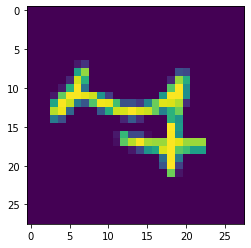

In [17]:
plt.imshow(data[21])
print(target[21])

## CNN model in pytorch (dataset-MNIST):

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader   #easier dataset management - minibatches of datasets to train on
import torchvision.datasets as datasets   #import pytorch std. datasets
import torchvision.transforms as transforms  #transformations to perform on datasets

c:\users\sjasm\appdata\local\programs\python\python39\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\sjasm\AppData\Local\Programs\Python\Python39\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [ ]:
#creating the CNN Model arch.

class CNNModel(nn.Module):
    def __init__(self,no_of_channels=1, no_of_classes):
        super(Model, self).__init__()
        self.c1=nn.Conv2d(in_channels=no_of_channels, out_channels=8, kernel_size=(3,3), stride=(1,1), padding=(1,1))   #same convolution as output size will be 748 only
        self.p1=nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))   #max pool layer
        self.c2=nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.fc1=nn.Linear
        
    def forward(self, x):
        
        return x